# TÜBİTAK 2204-D Lise Öğrencileri İklim Değişikliği Araştırma Projeleri Yarışması 2022
# Kuraklık Tespitine Yapay Zeka ile Bakış: Konya Kapalı Havzası Kuraklık Tahmini
# İl ve İlçe Veri Setini Düzenleme
Çalışmamızın kodları bu sayfada mevcuttur.

Bu sayfada;
* il ve ilçe sınırları veri setinin incelenmesini,
* veri setlerinin Konya Kapalı Havzasına göre düzenlenmesini

göreceksiniz.

## Kütüphaneler

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Boş geometry tipi değişkenlerin uyarılarını kapatmak için
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
import time

from shapely.ops import polygonize
from shapely.geometry import Polygon, LineString, MultiLineString, Polygon, Point, MultiPolygon

import folium

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Havza Sınırlarının İçeri Aktarılması ve İncelenmesi
Havza sınırlarıyla ilgili veri seti Ahmet Kargun tarafından yapılmıştır ve izni dahilinde kullanılmaktadır. Ayrıca önceki sayfada elde ettiğimiz konya kapalı havzası veri setini de içeri aktaralım

In [2]:
havzalar_shp_path = "../input/havza-snrlar-veri-seti-ahmet-kargun/Havza/Havzalar.shp"
havzalar_shp = gpd.read_file(havzalar_shp_path)
havzalar_shp.head()

OID_ Havza_No Havza_Rome              Havza_Ad    Shape_Leng    Shape_Area  \
0     0       19        XIX           Asi Havzası  6.821481e+05  7.912390e+09   
1     0       17       XVII  Doğu Akdeniz Havzası  9.398160e+05  2.180703e+10   
2     0       08       VIII  Batı Akdeniz Havzası  2.086449e+06  2.122387e+10   
3     0       10          X        Burdur Havzası  5.099270e+05  6.306173e+09   
4     0       09         IX       Antalya Havzası  1.041579e+06  2.033084e+10   

                                            geometry  
0  POLYGON ((1273212.254 4524401.588, 1273597.354...  
1  POLYGON ((1080637.741 4475037.826, 1080616.520...  
2  POLYGON ((607811.308 4577678.992, 608055.924 4...  
3  POLYGON ((677716.858 4626866.095, 678600.177 4...  
4  POLYGON ((772655.246 4639731.800, 772655.246 4...

In [3]:
kkh_shp_path="../input/2204-d-kkh-havza-s-n-rlar-na-g-re-k-rpma-lemi/Konya_Kapali_Havzasi_Polygon.shp"
kkh_shp = gpd.read_file(kkh_shp_path)
kkh_shp.head()

Havza_Ad                                           geometry
0  Konya Kapal? Havzas?  POLYGON ((679586.461 4205920.914, 679013.990 4...

In [4]:
kkh_shp["Havza_Ad"][0] = "Konya Kapalı Havzası"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
kkh_shp

Havza_Ad                                           geometry
0  Konya Kapalı Havzası  POLYGON ((679586.461 4205920.914, 679013.990 4...

Verilerin koordinat referans sistemlerini tekrar düzenleyelim.

In [6]:
havzalar_shp = havzalar_shp.to_crs(crs = "EPSG:4326")
kkh_shp = kkh_shp.to_crs(crs = "EPSG:4326")
kkh_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# İl - İlçe Sınırları Veri Setinin İçeri Aktarılması
Bu veri seti Milli Savunma Bakanlığı Harita Genel Müdürlüğü resmi sayfasından ücretsiz bir şekilde alınmıştır. Bu veri seti herkese açıktır.

In [7]:
il_shp_path = "../input/trkiye-mlki-idare-snrlar-hgm/İl_İlçe_Sınır_Ve_Yerleşim_Verisi/İl_Sınırı.shp"
il_shp = gpd.read_file(il_shp_path)
il_shp

Detay_Adı                                           geometry
0     İL_SINIRI  LINESTRING (-176160.672 4334305.392, -176968.4...
1     İL_SINIRI  LINESTRING (-176969.563 4334414.403, -177375.2...
2     İL_SINIRI  LINESTRING (-211040.320 4335900.096, -210760.6...
3     İL_SINIRI  LINESTRING (-217642.594 4340177.538, -217643.4...
4     İL_SINIRI  LINESTRING (-181196.451 4334527.891, -181208.7...
...         ...                                                ...
1260  İL_SINIRI  LINESTRING (-131644.970 4205561.290, -131547.3...
1261  İL_SINIRI  LINESTRING (-106103.092 4219529.965, -106105.8...
1262  İL_SINIRI  LINESTRING (-190435.164 4196565.370, -189896.3...
1263  İL_SINIRI  LINESTRING (-131644.970 4205561.290, -131692.5...
1264  İL_SINIRI  LINESTRING (-187759.239 4205302.904, -187668.5...

[1265 rows x 2 columns]

In [8]:
ilce_shp_path = "../input/trkiye-mlki-idare-snrlar-hgm/İl_İlçe_Sınır_Ve_Yerleşim_Verisi/İlçe_Sınırı.shp"
ilce_shp = gpd.read_file(ilce_shp_path)
ilce_shp

Detay_Adı                                           geometry
0     İLÇE_SINIRI  LINESTRING (92661.702 4290234.887, 92575.358 4...
1     İLÇE_SINIRI  LINESTRING (108430.424 4279319.145, 108430.272...
2     İLÇE_SINIRI  LINESTRING (104872.994 4298582.871, 104616.610...
3     İLÇE_SINIRI  LINESTRING (105400.516 4298587.726, 105147.084...
4     İLÇE_SINIRI  LINESTRING (108043.741 4304365.862, 107919.351...
...           ...                                                ...
3439  İLÇE_SINIRI  LINESTRING (-114838.465 4175182.993, -114721.4...
3440  İLÇE_SINIRI  LINESTRING (-190435.164 4196565.370, -189896.3...
3441  İLÇE_SINIRI  LINESTRING (-131644.970 4205561.290, -131692.5...
3442  İLÇE_SINIRI  LINESTRING (-187759.239 4205302.904, -187668.5...
3443  İLÇE_SINIRI  LINESTRING (-209487.463 4196149.060, -209487.4...

[3444 rows x 2 columns]

Havza sınırları ve Konya Kapalı Havzası sınırları ile işlemler yapabilmek için verileri koordinat referans sistemine göre yeniden düzenleyelim.

In [9]:
il_shp = il_shp.to_crs(crs = havzalar_shp.crs)
ilce_shp = ilce_shp.to_crs(crs = havzalar_shp.crs)

In [10]:
il_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
il_shp.head()

Detay_Adı                                           geometry
0  İL_SINIRI  LINESTRING (33.03325 36.43598, 33.02421 36.436...
1  İL_SINIRI  LINESTRING (33.02420 36.43681, 33.01964 36.437...
2  İL_SINIRI  LINESTRING (32.64354 36.44305, 32.64682 36.438...
3  İL_SINIRI  LINESTRING (32.56861 36.48009, 32.56860 36.480...
4  İL_SINIRI  LINESTRING (32.97700 36.43701, 32.97686 36.437...

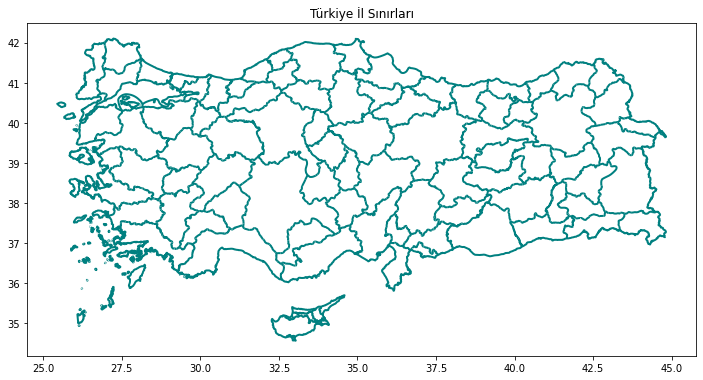

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
il_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
ax.set(title="Türkiye İl Sınırları")
plt.show()

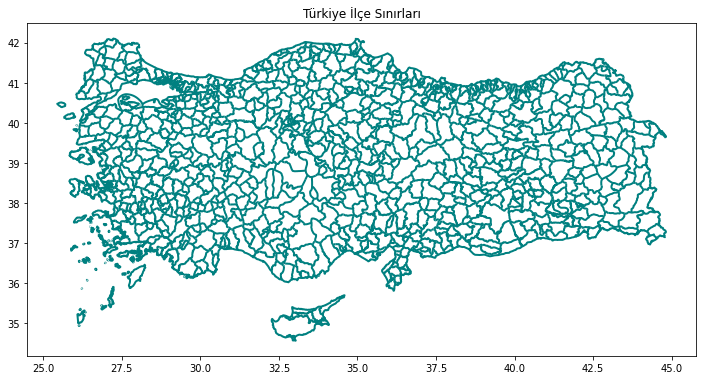

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
ilce_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
ax.set(title="Türkiye İlçe Sınırları")
plt.show()

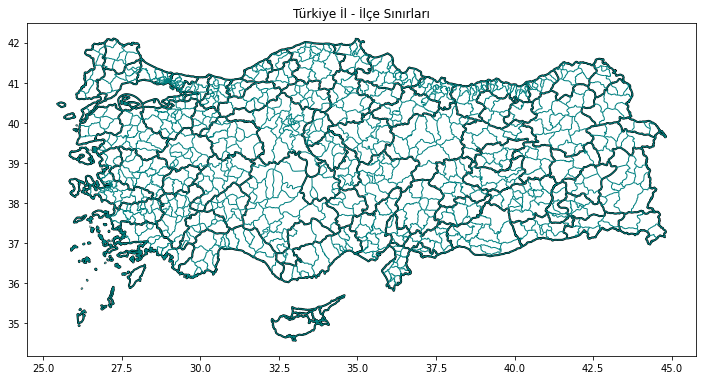

In [14]:
f, ax = plt.subplots(figsize=(12, 8))
il_shp.plot(color='black', linewidth=2, ax=ax, zorder=4)
ilce_shp.plot(color='teal', linewidth=1, ax=ax, zorder=4)
ax.set(title="Türkiye İl - İlçe Sınırları")
plt.show()

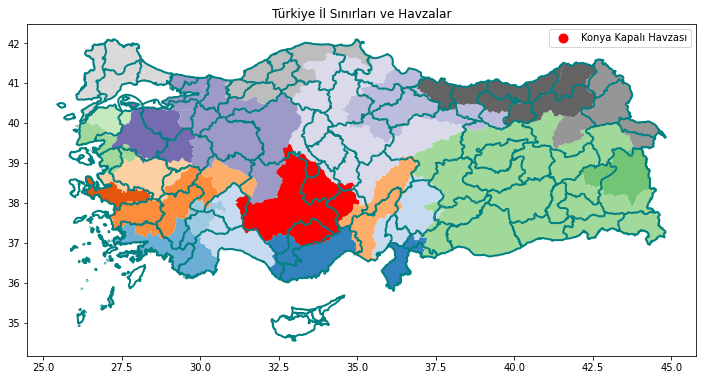

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
il_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
havzalar_shp.plot(cmap = "tab20c", ax=ax)
kkh_shp.plot(cmap = "hsv", ax=ax, legend = True, column="Havza_Ad")
ax.set(title="Türkiye İl Sınırları ve Havzalar")
plt.show()

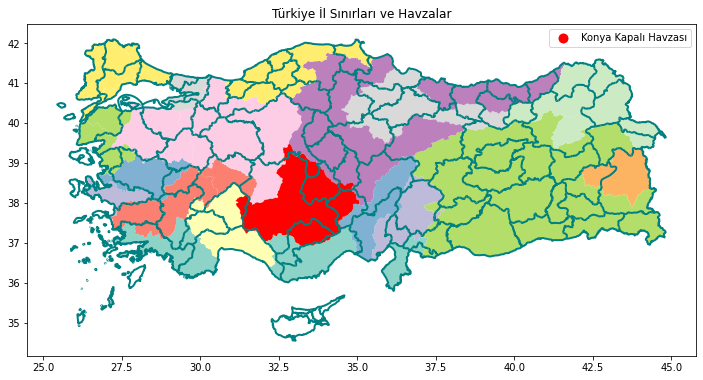

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
il_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
havzalar_shp.plot(cmap = "Set3", ax=ax)
kkh_shp.plot(cmap = "hsv", ax=ax, legend = True, column="Havza_Ad")
ax.set(title="Türkiye İl Sınırları ve Havzalar")
plt.show()

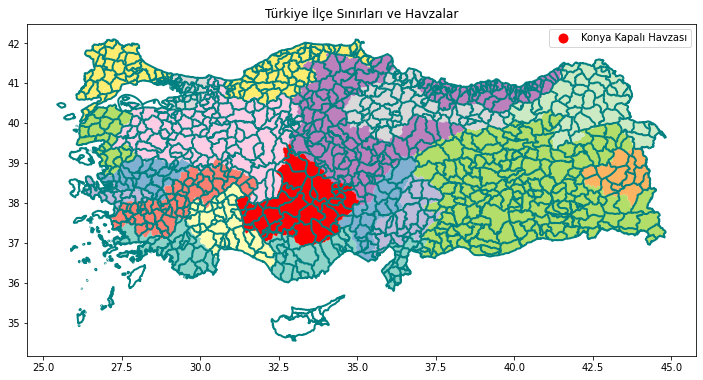

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
ilce_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
havzalar_shp.plot(cmap = "Set3", ax=ax)
kkh_shp.plot(cmap = "hsv", ax=ax, legend = True, column="Havza_Ad")
ax.set(title="Türkiye İlçe Sınırları ve Havzalar")
plt.show()

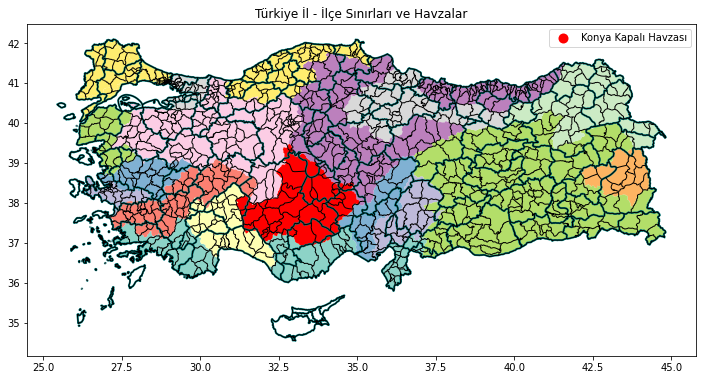

In [18]:
f, ax = plt.subplots(figsize=(12, 8))
il_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
ilce_shp.plot(color='black', linewidth=1, ax=ax, zorder=4)
havzalar_shp.plot(cmap = "Set3", ax=ax)
kkh_shp.plot(cmap = "hsv", ax=ax, legend = True, column="Havza_Ad")
ax.set(title="Türkiye İl - İlçe Sınırları ve Havzalar")
plt.show()

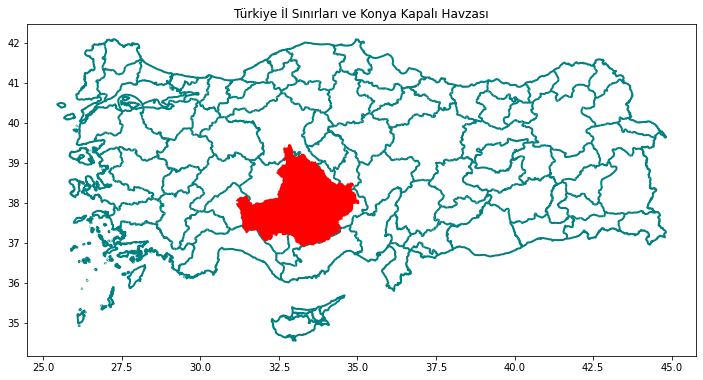

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
il_shp.plot(color='teal', linewidth=2, ax=ax, zorder=4)
kkh_shp.plot(color='red', linewidth=2, ax=ax, zorder=4)
ax.set(title="Türkiye İl Sınırları ve Konya Kapalı Havzası")
plt.show()

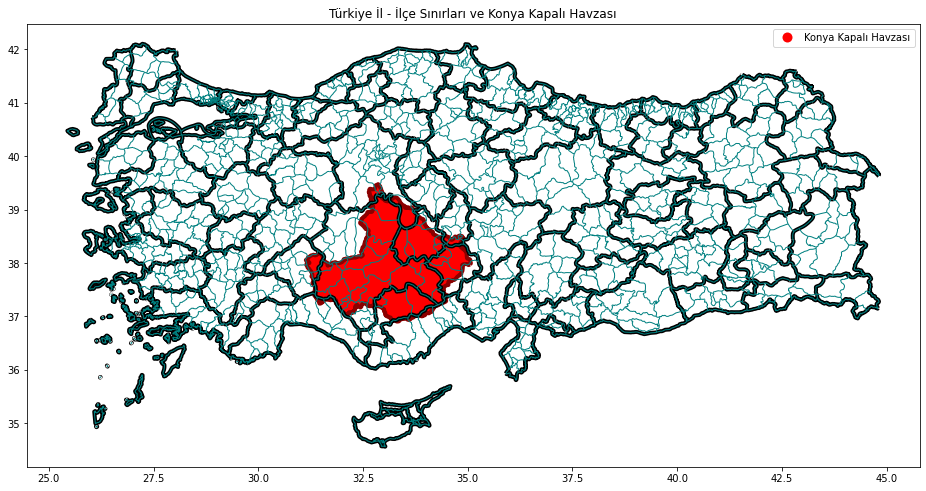

In [20]:
f, ax = plt.subplots(figsize=(16, 12))
kkh_shp.plot(cmap = "hsv", edgecolor = "darkred", linewidth=4, ax=ax, legend = True, column="Havza_Ad")
il_shp.plot(color='black', linewidth=4, ax=ax, zorder=4)
ilce_shp.plot(color='teal', linewidth=1, ax=ax, zorder=4)
ax.set(title="Türkiye İl - İlçe Sınırları ve Konya Kapalı Havzası")
plt.show()

Şimdi de il ve ilçe sınırlarını havza sınırlarına göre kırpalım.

In [21]:
il_df_clip = gpd.clip(il_shp, kkh_shp["geometry"])
il_df_clip.head()

Detay_Adı                                           geometry
61   İL_SINIRI  LINESTRING (31.98842 37.09510, 31.98894 37.094...
70   İL_SINIRI  MULTILINESTRING ((31.93149 37.17590, 31.93323 ...
110  İL_SINIRI  MULTILINESTRING ((31.72772 37.37410, 31.73087 ...
109  İL_SINIRI  LINESTRING (31.39569 37.36558, 31.40922 37.360...
38   İL_SINIRI  MULTILINESTRING ((33.23168 36.92996, 33.23336 ...

In [22]:
ilce_df_clip = gpd.clip(ilce_shp, kkh_shp["geometry"])
ilce_df_clip.head()

Detay_Adı                                           geometry
326  İLÇE_SINIRI  LINESTRING (34.41254 37.26767, 34.41487 37.269...
352  İLÇE_SINIRI  LINESTRING (34.46391 37.36746, 34.46507 37.368...
423  İLÇE_SINIRI  LINESTRING (34.31025 37.49269, 34.31357 37.488...
426  İLÇE_SINIRI  LINESTRING (34.31025 37.49269, 34.30345 37.491...
531  İLÇE_SINIRI  LINESTRING (34.38610 37.68577, 34.38607 37.685...

<AxesSubplot:>

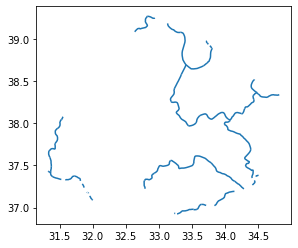

In [23]:
il_df_clip.plot()

<AxesSubplot:>

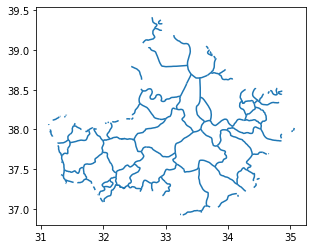

In [24]:
ilce_df_clip.plot()

Görüldüğü gibi havza sınırlarımız tam belirginleşmedi. Bunu tamamlamak için tekrar havza sınırlarını kullanacağız.

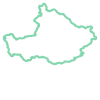

In [25]:
kkh_sinir = kkh_shp["geometry"][0].boundary
kkh_sinir

In [26]:
type(kkh_sinir)

shapely.geometry.linestring.LineString

In [27]:
ilgeo = []
ilgeo.append(kkh_sinir)
for i in list(il_df_clip.geometry):
    ilgeo.append(i)
il_sinirlar = gpd.GeoDataFrame({"Sınır" : "İL SINIR" , "geometry" : ilgeo}, crs = "EPSG:4326")
il_sinirlar

Sınır                                           geometry
0   İL SINIR  LINESTRING (35.04489 37.98317, 35.03833 37.981...
1   İL SINIR  LINESTRING (31.98842 37.09510, 31.98894 37.094...
2   İL SINIR  MULTILINESTRING ((31.93149 37.17590, 31.93323 ...
3   İL SINIR  MULTILINESTRING ((31.72772 37.37410, 31.73087 ...
4   İL SINIR  LINESTRING (31.39569 37.36558, 31.40922 37.360...
..       ...                                                ...
58  İL SINIR  LINESTRING (34.48308 38.36406, 34.47835 38.369...
59  İL SINIR  LINESTRING (33.72616 38.71792, 33.73089 38.720...
60  İL SINIR  LINESTRING (33.80183 38.88874, 33.80183 38.888...
61  İL SINIR  LINESTRING (33.80191 38.89007, 33.80192 38.890...
62  İL SINIR  MULTILINESTRING ((33.72313 38.98246, 33.72110 ...

[63 rows x 2 columns]

In [28]:
ilcegeo = []
ilcegeo.append(kkh_sinir)
for i in list(ilce_df_clip.geometry):
    ilcegeo.append(i)
ilce_sinirlar = gpd.GeoDataFrame({"Sınır" : "İLÇE SINIR" , "geometry" : ilcegeo}, crs = "EPSG:4326")
ilce_sinirlar

Sınır                                           geometry
0    İLÇE SINIR  LINESTRING (35.04489 37.98317, 35.03833 37.981...
1    İLÇE SINIR  LINESTRING (34.41254 37.26767, 34.41487 37.269...
2    İLÇE SINIR  LINESTRING (34.46391 37.36746, 34.46507 37.368...
3    İLÇE SINIR  LINESTRING (34.31025 37.49269, 34.31357 37.488...
4    İLÇE SINIR  LINESTRING (34.31025 37.49269, 34.30345 37.491...
..          ...                                                ...
160  İLÇE SINIR  LINESTRING (32.82722 39.27434, 32.82425 39.273...
161  İLÇE SINIR  LINESTRING (33.32698 39.08312, 33.30571 39.081...
162  İLÇE SINIR  LINESTRING (32.82722 39.27434, 32.83223 39.274...
163  İLÇE SINIR  LINESTRING (32.78117 39.41437, 32.78314 39.409...
164  İLÇE SINIR  LINESTRING (32.94803 39.33252, 32.94662 39.332...

[165 rows x 2 columns]

<AxesSubplot:>

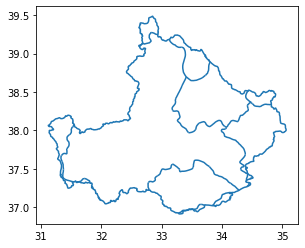

In [29]:
il_sinirlar.plot()

<AxesSubplot:>

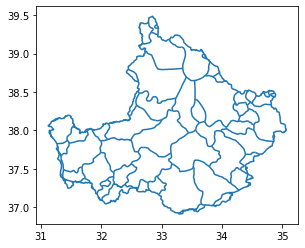

In [30]:
ilce_sinirlar.plot()

İl ve ilçe sınırlarını havza sınırları ile birleştirdik. Fakat elimizde bir sürü linestring ve multilinestring oluştu. Bunların hepsini tek bir multilinestring haline getirip daha sonra linestringlere parçalayacağız.

In [31]:
il_clip = gpd.clip(kkh_shp, il_sinirlar)
il_clip

Havza_Ad                                           geometry
0  Konya Kapalı Havzası  MULTILINESTRING ((35.04489 37.98317, 35.03833 ...

In [32]:
ilce_clip = gpd.clip(kkh_shp, ilce_sinirlar)
ilce_clip

Havza_Ad                                           geometry
0  Konya Kapalı Havzası  MULTILINESTRING ((35.04489 37.98317, 35.04088 ...

In [33]:
il_son = il_clip.explode(index_parts=True)
il_son

Havza_Ad  \
0 0     Konya Kapalı Havzası   
  1     Konya Kapalı Havzası   
  2     Konya Kapalı Havzası   
  3     Konya Kapalı Havzası   
  4     Konya Kapalı Havzası   
...                      ...   
  2139  Konya Kapalı Havzası   
  2140  Konya Kapalı Havzası   
  2141  Konya Kapalı Havzası   
  2142  Konya Kapalı Havzası   
  2143  Konya Kapalı Havzası   

                                                 geometry  
0 0     LINESTRING (35.04489 37.98317, 35.03833 37.98151)  
  1     LINESTRING (35.03833 37.98151, 35.03064 37.97756)  
  2     LINESTRING (35.03064 37.97756, 35.02041 37.97335)  
  3     LINESTRING (35.02041 37.97335, 35.00987 37.97287)  
  4     LINESTRING (35.00987 37.97287, 35.00043 37.97296)  
...                                                   ...  
  2139  LINESTRING (33.72616 38.71792, 33.73089 38.720...  
  2140  LINESTRING (33.80183 38.88874, 33.80183 38.888...  
  2141  LINESTRING (33.80191 38.89007, 33.80192 38.890...  
  2142  LINESTRING (33.72313 38.98246, 33.72110 38.981...  
  2143  LINESTRING (33.73313 38.95659, 33.73719 38.951...  

[2144 rows x 2 columns]

In [34]:
ilce_son = ilce_clip.explode(index_parts=True)
ilce_son

Havza_Ad  \
0 0     Konya Kapalı Havzası   
  1     Konya Kapalı Havzası   
  2     Konya Kapalı Havzası   
  3     Konya Kapalı Havzası   
  4     Konya Kapalı Havzası   
...                      ...   
  2345  Konya Kapalı Havzası   
  2346  Konya Kapalı Havzası   
  2347  Konya Kapalı Havzası   
  2348  Konya Kapalı Havzası   
  2349  Konya Kapalı Havzası   

                                                 geometry  
0 0     LINESTRING (35.04489 37.98317, 35.04088 37.98216)  
  1     LINESTRING (35.04088 37.98216, 35.03833 37.98151)  
  2     LINESTRING (35.03833 37.98151, 35.03064 37.97756)  
  3     LINESTRING (35.03064 37.97756, 35.02041 37.97335)  
  4     LINESTRING (35.02041 37.97335, 35.01642 37.97317)  
...                                                   ...  
  2345  LINESTRING (32.82722 39.27434, 32.82425 39.273...  
  2346  LINESTRING (33.32698 39.08312, 33.30571 39.081...  
  2347  LINESTRING (32.82722 39.27434, 32.83223 39.274...  
  2348  LINESTRING (32.78117 39.41437, 32.78314 39.409...  
  2349  LINESTRING (32.94803 39.33252, 32.94662 39.332...  

[2350 rows x 2 columns]

Şimdi de hepsini polygon hale getirelim.

In [35]:
illerpoly = polygonize(il_son["geometry"])
len_il = len(list(illerpoly))
illerpoly = polygonize(il_son["geometry"])
iller = gpd.GeoDataFrame( {"il" : range(len_il),
                            "geometry" : list(illerpoly)}, crs = "EPSG:4326")
iller

il                                           geometry
0    0  POLYGON ((35.04489 37.98317, 35.03833 37.98151...
1    1  POLYGON ((34.50508 37.37900, 34.49775 37.37649...
2    2  POLYGON ((34.41157 37.35142, 34.39887 37.34340...
3    3  POLYGON ((34.44162 37.32155, 34.44804 37.32087...
4    4  POLYGON ((34.28436 37.22108, 34.27774 37.21775...
5    5  POLYGON ((34.14111 37.19009, 34.13561 37.19010...
6    6  POLYGON ((33.71372 37.02449, 33.71182 37.01303...
7    7  POLYGON ((33.24633 36.92882, 33.23199 36.92987...
8    8  POLYGON ((32.00269 37.08952, 31.99757 37.09001...
9    9  POLYGON ((31.93475 37.16951, 31.92940 37.17634...
10  10  POLYGON ((31.91599 37.17962, 31.91446 37.17959...
11  11  POLYGON ((31.86966 37.23659, 31.86949 37.23662...
12  12  POLYGON ((31.81432 37.31645, 31.81197 37.31807...
13  13  POLYGON ((31.52532 37.33275, 31.52295 37.33075...
14  14  POLYGON ((31.32427 37.43215, 31.32444 37.43393...
15  15  POLYGON ((32.63377 39.08985, 32.63242 39.09093...
16  16  POLYGON ((33.13289 39.18935, 33.13831 39.19219...
17  17  POLYGON ((33.72313 38.98246, 33.72599 38.98042...
18  18  POLYGON ((33.73313 38.95659, 33.73614 38.95395...
19  19  POLYGON ((33.76884 38.92269, 33.77729 38.91972...
20  20  POLYGON ((34.44389 38.52312, 34.44842 38.52324...

<AxesSubplot:>

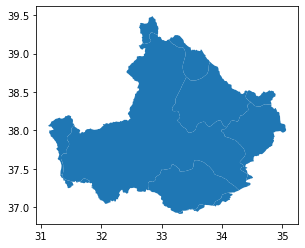

In [36]:
iller.plot()

In [37]:
ilcelerpoly = polygonize(ilce_son["geometry"])
len_ilce = len(list(ilcelerpoly))
ilcelerpoly = polygonize(ilce_son["geometry"])
ilceler = gpd.GeoDataFrame( {"ilce" : range(len_ilce),
                            "geometry" : list(ilcelerpoly)}, crs = "EPSG:4326")
ilceler

ilce                                           geometry
0      0  POLYGON ((35.04489 37.98317, 35.04088 37.98216...
1      1  POLYGON ((35.04088 37.98216, 35.03833 37.98151...
2      2  POLYGON ((34.86361 37.94323, 34.86529 37.93813...
3      3  POLYGON ((34.85726 37.85531, 34.85031 37.84722...
4      4  POLYGON ((34.65580 37.69153, 34.65462 37.69154...
..   ...                                                ...
89    89  POLYGON ((32.39691 37.30014, 32.39691 37.30013...
90    90  POLYGON ((32.10773 37.36304, 32.10972 37.35945...
91    91  POLYGON ((32.21194 37.45399, 32.20759 37.45533...
92    92  POLYGON ((33.15576 37.70506, 33.14416 37.70148...
93    93  POLYGON ((32.99880 38.12771, 32.99462 38.13352...

[94 rows x 2 columns]

<AxesSubplot:>

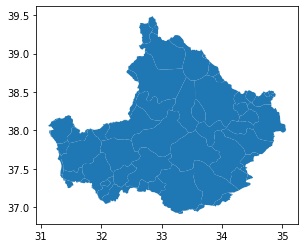

In [38]:
ilceler.plot()

Hepsini polygon yapmış durumdayız.

Fakat bu polygonların hangi il ve ilçelere ait olduğu bilmiyoruz. Bunun için bu polygonları haritalandıracağız ve il ve ilçelerini tespit edeceğiz.

In [39]:
map = folium.Map(location = [38,33], zoom_start=7)
folium.GeoJson(data=iller["geometry"]).add_to(map)
map

In [40]:
iller = iller.to_crs(epsg=4326)
iller['centroid'] = iller.centroid
iller['centroid'] = iller['centroid'].to_crs(epsg=4326)
iller.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


il                                           geometry  \
0   0  POLYGON ((35.04489 37.98317, 35.03833 37.98151...   
1   1  POLYGON ((34.50508 37.37900, 34.49775 37.37649...   
2   2  POLYGON ((34.41157 37.35142, 34.39887 37.34340...   
3   3  POLYGON ((34.44162 37.32155, 34.44804 37.32087...   
4   4  POLYGON ((34.28436 37.22108, 34.27774 37.21775...   

                    centroid  
0  POINT (34.54969 37.98591)  
1  POINT (34.48395 37.37540)  
2  POINT (32.81806 37.94680)  
3  POINT (34.45290 37.29713)  
4  POINT (33.47320 37.26002)

In [41]:
for _, r in iller.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon], popup = r.il).add_to(map)
map

Haritadaki sınırlar Harita Genel Müdürlüğünün sınırlarına tam uymayabilir fakat yaklaşık olarak HGM'ye benzer. HGM verileri daha güvenilir ve resmi olduğu için il ve ilçelerde HGM verilerine göre işlemler yapılacaktır.

Tespitlere göre:
* **Niğde** --> 0
* **Mersin** --> 3,5,6
* **Konya** --> 2
* **Karaman** --> 4
* **Isparta** --> 14
* **Antalya** --> 8,11,12,13
* **Ankara** --> 15,16
* **Aksaray** --> 17,19
* **Nevşehir** --> 20

1,7,9,10 ve 18 nolu polygonların boyutları çok küçük olduğu için veri setine eklenmeyecektir.

Şimdi de sırayla yerleştirelim.

In [42]:
illerpoly = polygonize(il_son["geometry"])
illist = ["Nigde", "none", "Konya", "Mersin", "Karaman", "Mersin", "Mersin",
          "none", "Antalya", "none", "none", "Antalya", "Antalya", "Antalya",
          "Isparta", "Ankara", "Ankara", "Aksaray", "none", "Aksaray", "Nevsehir"]
iller = gpd.GeoDataFrame( {"il" : illist, "geometry" : list(illerpoly)}, crs = "EPSG:4326")
iller

il                                           geometry
0      Nigde  POLYGON ((35.04489 37.98317, 35.03833 37.98151...
1       none  POLYGON ((34.50508 37.37900, 34.49775 37.37649...
2      Konya  POLYGON ((34.41157 37.35142, 34.39887 37.34340...
3     Mersin  POLYGON ((34.44162 37.32155, 34.44804 37.32087...
4    Karaman  POLYGON ((34.28436 37.22108, 34.27774 37.21775...
5     Mersin  POLYGON ((34.14111 37.19009, 34.13561 37.19010...
6     Mersin  POLYGON ((33.71372 37.02449, 33.71182 37.01303...
7       none  POLYGON ((33.24633 36.92882, 33.23199 36.92987...
8    Antalya  POLYGON ((32.00269 37.08952, 31.99757 37.09001...
9       none  POLYGON ((31.93475 37.16951, 31.92940 37.17634...
10      none  POLYGON ((31.91599 37.17962, 31.91446 37.17959...
11   Antalya  POLYGON ((31.86966 37.23659, 31.86949 37.23662...
12   Antalya  POLYGON ((31.81432 37.31645, 31.81197 37.31807...
13   Antalya  POLYGON ((31.52532 37.33275, 31.52295 37.33075...
14   Isparta  POLYGON ((31.32427 37.43215, 31.32444 37.43393...
15    Ankara  POLYGON ((32.63377 39.08985, 32.63242 39.09093...
16    Ankara  POLYGON ((33.13289 39.18935, 33.13831 39.19219...
17   Aksaray  POLYGON ((33.72313 38.98246, 33.72599 38.98042...
18      none  POLYGON ((33.73313 38.95659, 33.73614 38.95395...
19   Aksaray  POLYGON ((33.76884 38.92269, 33.77729 38.91972...
20  Nevsehir  POLYGON ((34.44389 38.52312, 34.44842 38.52324...

none değerleri de atalım. (Yani çok küçük boyutlu olan polygonları)

In [43]:
iller = iller[iller.il != "none"]
iller

il                                           geometry
0      Nigde  POLYGON ((35.04489 37.98317, 35.03833 37.98151...
2      Konya  POLYGON ((34.41157 37.35142, 34.39887 37.34340...
3     Mersin  POLYGON ((34.44162 37.32155, 34.44804 37.32087...
4    Karaman  POLYGON ((34.28436 37.22108, 34.27774 37.21775...
5     Mersin  POLYGON ((34.14111 37.19009, 34.13561 37.19010...
6     Mersin  POLYGON ((33.71372 37.02449, 33.71182 37.01303...
8    Antalya  POLYGON ((32.00269 37.08952, 31.99757 37.09001...
11   Antalya  POLYGON ((31.86966 37.23659, 31.86949 37.23662...
12   Antalya  POLYGON ((31.81432 37.31645, 31.81197 37.31807...
13   Antalya  POLYGON ((31.52532 37.33275, 31.52295 37.33075...
14   Isparta  POLYGON ((31.32427 37.43215, 31.32444 37.43393...
15    Ankara  POLYGON ((32.63377 39.08985, 32.63242 39.09093...
16    Ankara  POLYGON ((33.13289 39.18935, 33.13831 39.19219...
17   Aksaray  POLYGON ((33.72313 38.98246, 33.72599 38.98042...
19   Aksaray  POLYGON ((33.76884 38.92269, 33.77729 38.91972...
20  Nevsehir  POLYGON ((34.44389 38.52312, 34.44842 38.52324...

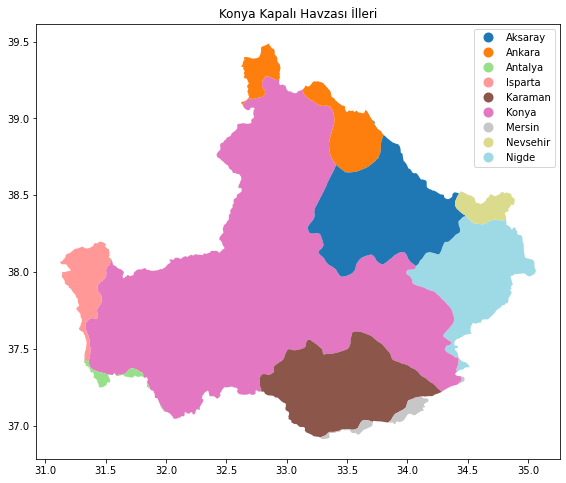

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
iller.plot(cmap = "tab20", markersize=100, ax=ax, categorical=True,
           legend = True, column='il', marker='o')
ax.set(title="Konya Kapalı Havzası İlleri")
plt.show()

Bunu daha sonraki işlemlerde kullanmamız için kaydetmeliyiz.

In [45]:
iller.to_file("./Il_Sinirlari_Polygon.shp")

Şimdi de illere özel oluşturacağımız geodataframeleri shapefile olarak kaydedelim.

In [46]:
illist = []
geomlist = []
os.mkdir("./Il_Polygonlar")
for _, il in enumerate(iller.il):
    gdf = iller[iller.il == il]
    gdf.to_file("./Il_Polygonlar/Il_"+il+"_Sinirlari_Polygon.shp")

Şimdi de ilçelere bakalım.

In [47]:
m = folium.Map(location = [38,33], zoom_start=7)
folium.GeoJson(data=ilceler["geometry"]).add_to(m)
folium.GeoJson(data=iller["geometry"], style_function=lambda x: {'fillColor': 'orange', 
                                                                  'color': '#FF2727'}).add_to(m)
ilceler = ilceler.to_crs(epsg=4326)
ilceler['centroid'] = ilceler.centroid
ilceler['centroid'] = ilceler['centroid'].to_crs(epsg=4326)

for _, r in ilceler.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon], popup = r.ilce).add_to(m)
m

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


Tespitlere göre:

**Niğde**
* Niğde Merkez --> 0, Çamardı --> 2,79, Bor --> 3, Ulukışla --> 5, Altunhisar --> 82, Çiftlik --> 83

**Mersin**
* Çamlıyayla --> 6,8, Erdemli --> 10, Toroslar --> 11, Silifke --> 12, Mut --> 13

**Konya**
* Halkapınar --> 7, Güneysınır --> 17, Bozkır --> 18, Ahırlı --> 19,20, Seydişehir --> 23, Derebucak --> 27, Doğanhisar --> 44, Hüyük --> 45, Ilgın --> 46,48,50,51,53, Beyşehir --> 47, Derbent --> 49, Selçuklu --> 52, Kadınhanı --> 54, Sarayönü --> 55,56,57,59, Cihanbeyli --> 58, Kulu --> 60, Haymana --> 61, Ereğli --> 80, Karapınar --> 81, Emirgazi --> 84, Çumra --> 88, Akören --> 89, Yalıhüyük --> 90, Meram --> 91, Karatay --> 92, Altınekin --> 93

**Karaman**
* Ayrancı --> 9, Karaman Merkez --> 14, Kazımkarabekir --> 15

**Antalya**
* Akseki --> 26, İbradi --> 28, Manavgat --> 30

**Isparta**
* Sütçüler --> 31, Aksu (Isparta) --> 32, Yenişarbademli --> 33, Şarkikaraağaç --> 34, Eğirdir --> 35, Gelendost --> 36,37, Yalvaç --> 38,40

**Ankara**
* Gölbaşı --> 62, Bala --> 63, Şereflikoçhisar --> 64, Evren --> 65,66

**Aksaray**
* Sarıyahşi --> 67,69, Ağaçören --> 70, Ortaköy --> 71, Aksaray Merkez --> 72, Gülağaç --> 73, Eskil --> 85, Sultanhanı --> 86, Güzelyurt --> 87

**Nevşehir**
* Acıgöl --> 74, Derinkuyu --> 75, Nevşehir Merkez --> 77, Ürgüp --> 78

Şimdi bunları bir geodataframe haline getirelim

In [48]:
ilcelistesi = ["Nigde_Merkez", "none", "Camardi", "Bor", "none", "Ulukisla", "Camliyayla",
               "Halkapinar", "Camliyayla", "Ayranci", "Erdemli", "Toroslar", "Silifke", "Mut",
               "Karaman", "none", "Kazimkarabekir", "Guneysinir", "Bozkir", "Ahirli", "Ahirli",
               "Akseki", "none", "Seydisehir", "none", "Akseki", "Akseki", "Derebucak",
               "Ibradi", "none", "Manavgat", "Sutculer", "Aksu", "Yenisarbademli", "Sarkikaraagac",
               "Egirdir", "Gelendost", "Gelendost", "Yalvac", "none", "Yalvac", "none",
               "none", "none", "Doganhisar", "Huyuk", "Ilgin", "Beysehir", "Ilgin",
               "Derbent", "Ilgin", "Ilgin", "Selcuklu", "Ilgin", "Kadinhani", "Sarayonu",
               "Sarayonu", "Sarayonu", "Cihanbeyli", "Sarayonu", "Kulu", "Haymana", "Golbasi",
               "Bala", "Sereflikochisar", "Evren", "Evren", "Sariyahsi", "none", "Sariyahsi", 
               "Agacoren", "Ortakoy", "Aksaray_Merkez", "Gulagac", "Acigol", "Derinkuyu", "none",
               "Nevsehir_Merkez", "Urgup", "Camardi", "Eregli", "Karapinar", "Altunhisar", "Ciftlik",
               "Emirgazi", "Eskil", "Sultanhani", "Guzelyurt", "Cumra", "Akoren", "Yalihuyuk",
               "Meram", "Karatay", "Altinekin"]

In [49]:
ilcelerpoly = polygonize(ilce_son["geometry"])
ilceler = gpd.GeoDataFrame( {"ilce" : ilcelistesi,
                            "geometry" : list(ilcelerpoly)}, crs = "EPSG:4326")
ilceler

ilce                                           geometry
0   Nigde_Merkez  POLYGON ((35.04489 37.98317, 35.04088 37.98216...
1           none  POLYGON ((35.04088 37.98216, 35.03833 37.98151...
2        Camardi  POLYGON ((34.86361 37.94323, 34.86529 37.93813...
3            Bor  POLYGON ((34.85726 37.85531, 34.85031 37.84722...
4           none  POLYGON ((34.65580 37.69153, 34.65462 37.69154...
..           ...                                                ...
89        Akoren  POLYGON ((32.39691 37.30014, 32.39691 37.30013...
90     Yalihuyuk  POLYGON ((32.10773 37.36304, 32.10972 37.35945...
91         Meram  POLYGON ((32.21194 37.45399, 32.20759 37.45533...
92       Karatay  POLYGON ((33.15576 37.70506, 33.14416 37.70148...
93     Altinekin  POLYGON ((32.99880 38.12771, 32.99462 38.13352...

[94 rows x 2 columns]

In [50]:
ilceler = ilceler[ilceler.ilce != "none"]
ilceler

ilce                                           geometry
0   Nigde_Merkez  POLYGON ((35.04489 37.98317, 35.04088 37.98216...
2        Camardi  POLYGON ((34.86361 37.94323, 34.86529 37.93813...
3            Bor  POLYGON ((34.85726 37.85531, 34.85031 37.84722...
5       Ulukisla  POLYGON ((34.62206 37.68925, 34.61587 37.68602...
6     Camliyayla  POLYGON ((34.50508 37.37900, 34.49775 37.37649...
..           ...                                                ...
89        Akoren  POLYGON ((32.39691 37.30014, 32.39691 37.30013...
90     Yalihuyuk  POLYGON ((32.10773 37.36304, 32.10972 37.35945...
91         Meram  POLYGON ((32.21194 37.45399, 32.20759 37.45533...
92       Karatay  POLYGON ((33.15576 37.70506, 33.14416 37.70148...
93     Altinekin  POLYGON ((32.99880 38.12771, 32.99462 38.13352...

[82 rows x 2 columns]

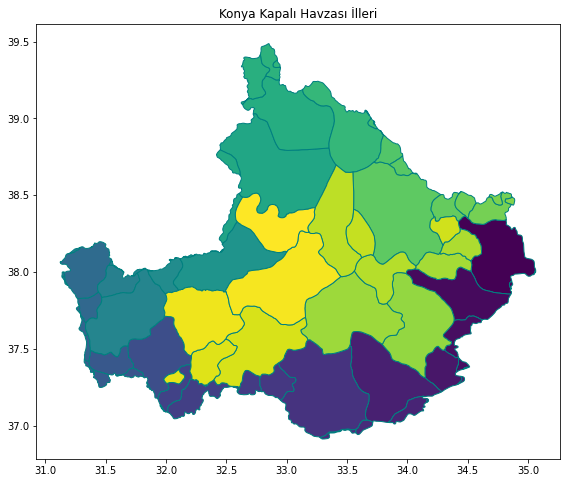

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
ilceler.plot(cmap = "viridis", edgecolor = "teal", linewidth=1,ax=ax)
ax.set(title="Konya Kapalı Havzası İlleri")
plt.show()

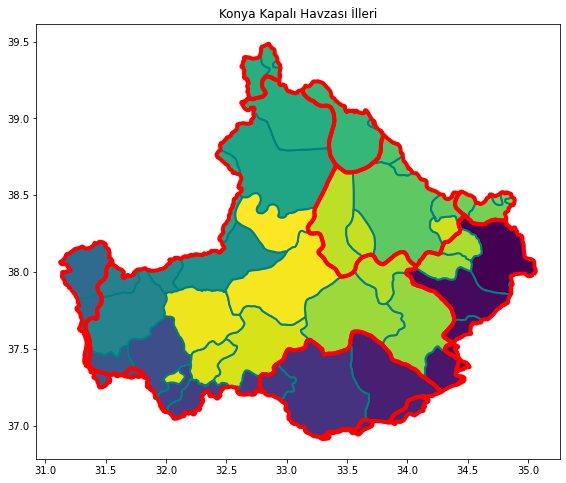

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
ilceler.plot(cmap = "viridis", edgecolor = "teal", linewidth=2, ax=ax)
iller.plot(color = "none", edgecolor = "red", linewidth=4, ax=ax)
ax.set(title="Konya Kapalı Havzası İlleri")
plt.show()

Sonradan kullanmak için kaydedelim

In [53]:
ilceler.to_file("Ilce_Sinirlari_Polygon.shp")

Ayrı ayrı kullanmak için de kaydedelim

In [54]:
ilcelist = []
geomlist = []
os.mkdir("./Ilce_Polygonlar")
for _, ilce in enumerate(ilceler.ilce):
    gdf = ilceler[ilceler.ilce == ilce]
    gdf.to_file("./Ilce_Polygonlar/Ilce_"+ilce+"_Sinirlari_Polygon.shp")

In [55]:
düz_ilce_list = []
for i in ilcelistesi:
    if i in düz_ilce_list or i=="none":
        continue
    düz_ilce_list.append(i)
    
düz_ilce_list

['Nigde_Merkez',
 'Camardi',
 'Bor',
 'Ulukisla',
 'Camliyayla',
 'Halkapinar',
 'Ayranci',
 'Erdemli',
 'Toroslar',
 'Silifke',
 'Mut',
 'Karaman',
 'Kazimkarabekir',
 'Guneysinir',
 'Bozkir',
 'Ahirli',
 'Akseki',
 'Seydisehir',
 'Derebucak',
 'Ibradi',
 'Manavgat',
 'Sutculer',
 'Aksu',
 'Yenisarbademli',
 'Sarkikaraagac',
 'Egirdir',
 'Gelendost',
 'Yalvac',
 'Doganhisar',
 'Huyuk',
 'Ilgin',
 'Beysehir',
 'Derbent',
 'Selcuklu',
 'Kadinhani',
 'Sarayonu',
 'Cihanbeyli',
 'Kulu',
 'Haymana',
 'Golbasi',
 'Bala',
 'Sereflikochisar',
 'Evren',
 'Sariyahsi',
 'Agacoren',
 'Ortakoy',
 'Aksaray_Merkez',
 'Gulagac',
 'Acigol',
 'Derinkuyu',
 'Nevsehir_Merkez',
 'Urgup',
 'Eregli',
 'Karapinar',
 'Altunhisar',
 'Ciftlik',
 'Emirgazi',
 'Eskil',
 'Sultanhani',
 'Guzelyurt',
 'Cumra',
 'Akoren',
 'Yalihuyuk',
 'Meram',
 'Karatay',
 'Altinekin']

In [56]:
len(düz_ilce_list)

66

# MGM İstasyonları

Şimdi de meteorolojik verileri aldığımız istasyonlara bakalım.

In [57]:
e_istasyon = gpd.read_file("../input/istasyonlar/mygeodata/2204-d_1-point.shp")
e_istasyon

Name descriptio        altitudeMo  \
0  Konya Meteoroloji Blg. Md.       None  relativeToGround   
1             Tacin Cd. No:11       None  relativeToGround   
2   37°11'35.5"N 33°13'12.7"E       None  relativeToGround   
3   37°57'30.6"N 34°40'46.2"E       None  relativeToGround   
4   38°57'14.0"N 33°25'18.5"E       None  relativeToGround   
5   37°43'05.2"N 31°24'20.2"E       None  relativeToGround   
6   38°16'58.8"N 31°10'40.1"E       None  relativeToGround   
7   37°55'58.8"N 31°17'45.6"E       None  relativeToGround   

                    geometry  
0  POINT (32.47140 37.86849)  
1  POINT (33.99817 38.37039)  
2  POINT (33.22020 37.19320)  
3  POINT (34.67950 37.95850)  
4  POINT (33.42180 38.95390)  
5  POINT (31.40560 37.71810)  
6  POINT (31.17780 38.28300)  
7  POINT (31.29600 37.93300)

In [58]:
m = folium.Map(location = [38,33], zoom_start=7)
folium.GeoJson(data=ilceler["geometry"]).add_to(m)
folium.GeoJson(data=iller["geometry"], style_function=lambda x: {'fillColor': 'orange', 
                                                                  'color': '#FF2727'}).add_to(m)
ilceler = ilceler.to_crs(epsg=4326)
ilceler['centroid'] = ilceler.centroid
ilceler['centroid'] = ilceler['centroid'].to_crs(epsg=4326)

for _, r in ilceler.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon], popup = r.ilce).add_to(m)
    
for a, r in e_istasyon.iterrows():
    lat = r["geometry"].y
    lon = r["geometry"].x
    folium.Marker(location=[lat, lon], popup = r.Name, icon = folium.Icon(color = "%s" % "green")).add_to(m)
    
m

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [59]:
y_istasyon = gpd.read_file("../input/istasyonlar/mygeodata (1)/Unbenanntes_Projekt-point.shp")
y_istasyon

Name descriptio        altitudeMo  \
0  39°26'08.2"N 32°30'55.1"E       None  relativeToGround   
1  38°17'56.0"N 32°52'45.1"E       None  relativeToGround   
2  37°40'39.7"N 31°44'46.7"E       None  relativeToGround   
3  38°20'22.9"N 34°42'52.2"E       None  relativeToGround   
4  38°32'53.2"N 34°30'51.1"E       None  relativeToGround   
5  37°31'31.8"N 34°02'54.6"E       None  relativeToGround   
6  37°26'58.6"N 31°51'13.7"E       None  relativeToGround   
7  37°14'25.1"N 32°06'52.9"E       None  relativeToGround   
8  37°27'06.1"N 32°22'49.1"E       None  relativeToGround   
9  37°17'31.9"N 32°06'43.9"E       None  relativeToGround   

                    geometry  
0  POINT (32.51530 39.43560)  
1  POINT (32.87920 38.29890)  
2  POINT (31.74630 37.67770)  
3  POINT (34.71450 38.33970)  
4  POINT (34.51420 38.54810)  
5  POINT (34.04850 37.52550)  
6  POINT (31.85380 37.44960)  
7  POINT (32.11470 37.24030)  
8  POINT (32.38030 37.45170)  
9  POINT (32.11220 37.29220)

In [60]:
m = folium.Map(location = [38,33], zoom_start=7)
folium.GeoJson(data=ilceler["geometry"]).add_to(m)
folium.GeoJson(data=iller["geometry"], style_function=lambda x: {'fillColor': 'orange', 
                                                                  'color': '#FF2727'}).add_to(m)

for _, r in y_istasyon.iterrows():
    lat = r["geometry"].y
    lon = r["geometry"].x
    folium.Marker(location=[lat, lon], popup = r.Name, icon = folium.Icon(color = "%s" % "green")).add_to(m)
    
for a, r in e_istasyon.iterrows():
    lat = r["geometry"].y
    lon = r["geometry"].x
    folium.Marker(location=[lat, lon], popup = r.Name, icon = folium.Icon(color = "%s" % "pink")).add_to(m)
    
m

In [61]:
e_istlist = ["Konya_Bolge", "Aksaray", "Karaman", "Nigde", "Sereflikochisar", "Yenisarbademli"]

In [62]:
e_istasyon

Name descriptio        altitudeMo  \
0  Konya Meteoroloji Blg. Md.       None  relativeToGround   
1             Tacin Cd. No:11       None  relativeToGround   
2   37°11'35.5"N 33°13'12.7"E       None  relativeToGround   
3   37°57'30.6"N 34°40'46.2"E       None  relativeToGround   
4   38°57'14.0"N 33°25'18.5"E       None  relativeToGround   
5   37°43'05.2"N 31°24'20.2"E       None  relativeToGround   
6   38°16'58.8"N 31°10'40.1"E       None  relativeToGround   
7   37°55'58.8"N 31°17'45.6"E       None  relativeToGround   

                    geometry  
0  POINT (32.47140 37.86849)  
1  POINT (33.99817 38.37039)  
2  POINT (33.22020 37.19320)  
3  POINT (34.67950 37.95850)  
4  POINT (33.42180 38.95390)  
5  POINT (31.40560 37.71810)  
6  POINT (31.17780 38.28300)  
7  POINT (31.29600 37.93300)

In [63]:
e_ist = gpd.GeoDataFrame( {"Name" : e_istlist, "geometry": e_istasyon["geometry"][:-2]})
e_ist

Name                   geometry
0      Konya_Bolge  POINT (32.47140 37.86849)
1          Aksaray  POINT (33.99817 38.37039)
2          Karaman  POINT (33.22020 37.19320)
3            Nigde  POINT (34.67950 37.95850)
4  Sereflikochisar  POINT (33.42180 38.95390)
5   Yenisarbademli  POINT (31.40560 37.71810)

In [64]:
y_istlist=  ["Altinekin", "Beysehir", "Eregli", "Ahirli", "Akoren", "Yalihuyuk" ]
# Olmayan istasyonlar: 0 3 4 6

In [65]:
y_istasyon

Name descriptio        altitudeMo  \
0  39°26'08.2"N 32°30'55.1"E       None  relativeToGround   
1  38°17'56.0"N 32°52'45.1"E       None  relativeToGround   
2  37°40'39.7"N 31°44'46.7"E       None  relativeToGround   
3  38°20'22.9"N 34°42'52.2"E       None  relativeToGround   
4  38°32'53.2"N 34°30'51.1"E       None  relativeToGround   
5  37°31'31.8"N 34°02'54.6"E       None  relativeToGround   
6  37°26'58.6"N 31°51'13.7"E       None  relativeToGround   
7  37°14'25.1"N 32°06'52.9"E       None  relativeToGround   
8  37°27'06.1"N 32°22'49.1"E       None  relativeToGround   
9  37°17'31.9"N 32°06'43.9"E       None  relativeToGround   

                    geometry  
0  POINT (32.51530 39.43560)  
1  POINT (32.87920 38.29890)  
2  POINT (31.74630 37.67770)  
3  POINT (34.71450 38.33970)  
4  POINT (34.51420 38.54810)  
5  POINT (34.04850 37.52550)  
6  POINT (31.85380 37.44960)  
7  POINT (32.11470 37.24030)  
8  POINT (32.38030 37.45170)  
9  POINT (32.11220 37.29220)

In [66]:
y_geo=[]
for i, g in enumerate(y_istasyon["geometry"]):
    if i==0 or i==3 or i==4 or i==6:
        continue
    y_geo.append(g)

y_geo

In [67]:
y_ist = gpd.GeoDataFrame( {"Name": y_istlist, "geometry": y_geo})
y_ist

Name                   geometry
0  Altinekin  POINT (32.87920 38.29890)
1   Beysehir  POINT (31.74630 37.67770)
2     Eregli  POINT (34.04850 37.52550)
3     Ahirli  POINT (32.11470 37.24030)
4     Akoren  POINT (32.38030 37.45170)
5  Yalihuyuk  POINT (32.11220 37.29220)

In [68]:
e_ist.to_file("Eski_Istasyonlar.shp")
y_ist.to_file("Yeni_Istasyonlar.shp")

# Orta Noktalarını Alarak En Yakın İstasyona Ulaşma

In [69]:
iller

il                                           geometry
0      Nigde  POLYGON ((35.04489 37.98317, 35.03833 37.98151...
2      Konya  POLYGON ((34.41157 37.35142, 34.39887 37.34340...
3     Mersin  POLYGON ((34.44162 37.32155, 34.44804 37.32087...
4    Karaman  POLYGON ((34.28436 37.22108, 34.27774 37.21775...
5     Mersin  POLYGON ((34.14111 37.19009, 34.13561 37.19010...
6     Mersin  POLYGON ((33.71372 37.02449, 33.71182 37.01303...
8    Antalya  POLYGON ((32.00269 37.08952, 31.99757 37.09001...
11   Antalya  POLYGON ((31.86966 37.23659, 31.86949 37.23662...
12   Antalya  POLYGON ((31.81432 37.31645, 31.81197 37.31807...
13   Antalya  POLYGON ((31.52532 37.33275, 31.52295 37.33075...
14   Isparta  POLYGON ((31.32427 37.43215, 31.32444 37.43393...
15    Ankara  POLYGON ((32.63377 39.08985, 32.63242 39.09093...
16    Ankara  POLYGON ((33.13289 39.18935, 33.13831 39.19219...
17   Aksaray  POLYGON ((33.72313 38.98246, 33.72599 38.98042...
19   Aksaray  POLYGON ((33.76884 38.92269, 33.77729 38.91972...
20  Nevsehir  POLYGON ((34.44389 38.52312, 34.44842 38.52324...

In [70]:
iller['centroid'] = iller.centroid
iller

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


il                                           geometry  \
0      Nigde  POLYGON ((35.04489 37.98317, 35.03833 37.98151...   
2      Konya  POLYGON ((34.41157 37.35142, 34.39887 37.34340...   
3     Mersin  POLYGON ((34.44162 37.32155, 34.44804 37.32087...   
4    Karaman  POLYGON ((34.28436 37.22108, 34.27774 37.21775...   
5     Mersin  POLYGON ((34.14111 37.19009, 34.13561 37.19010...   
6     Mersin  POLYGON ((33.71372 37.02449, 33.71182 37.01303...   
8    Antalya  POLYGON ((32.00269 37.08952, 31.99757 37.09001...   
11   Antalya  POLYGON ((31.86966 37.23659, 31.86949 37.23662...   
12   Antalya  POLYGON ((31.81432 37.31645, 31.81197 37.31807...   
13   Antalya  POLYGON ((31.52532 37.33275, 31.52295 37.33075...   
14   Isparta  POLYGON ((31.32427 37.43215, 31.32444 37.43393...   
15    Ankara  POLYGON ((32.63377 39.08985, 32.63242 39.09093...   
16    Ankara  POLYGON ((33.13289 39.18935, 33.13831 39.19219...   
17   Aksaray  POLYGON ((33.72313 38.98246, 33.72599 38.98042...   
19   Aksaray  POLYGON ((33.76884 38.92269, 33.77729 38.91972...   
20  Nevsehir  POLYGON ((34.44389 38.52312, 34.44842 38.52324...   

                     centroid  
0   POINT (34.54969 37.98591)  
2   POINT (32.81806 37.94680)  
3   POINT (34.45290 37.29713)  
4   POINT (33.47320 37.26002)  
5   POINT (34.02366 37.10653)  
6   POINT (33.56222 36.97993)  
8   POINT (31.96920 37.11357)  
11  POINT (31.85267 37.25813)  
12  POINT (31.72582 37.33993)  
13  POINT (31.44808 37.32176)  
14  POINT (31.34664 37.93881)  
15  POINT (32.78488 39.30690)  
16  POINT (33.51083 38.90861)  
17  POINT (33.72436 38.97172)  
19  POINT (33.79089 38.37669)  
20  POINT (34.63953 38.41980)

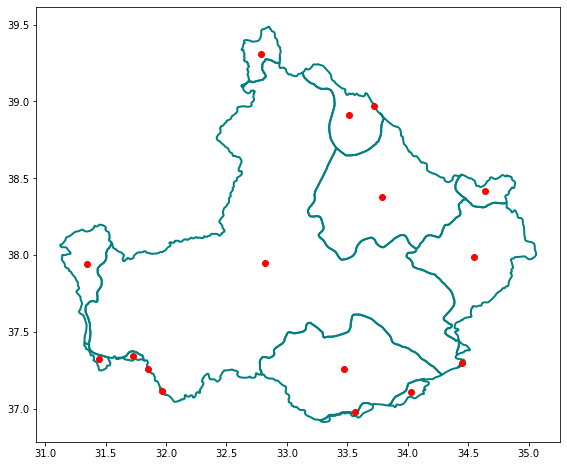

In [71]:
fig, ax = plt.subplots(figsize = (12,8))
iller.plot(color="none", edgecolor = "teal", linewidth=2, ax=ax)
iller["centroid"].plot(color="red", ax=ax)
plt.show()

In [72]:
ilceler['centroid'] = ilceler.centroid
ilceler

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


ilce                                           geometry  \
0   Nigde_Merkez  POLYGON ((35.04489 37.98317, 35.04088 37.98216...   
2        Camardi  POLYGON ((34.86361 37.94323, 34.86529 37.93813...   
3            Bor  POLYGON ((34.85726 37.85531, 34.85031 37.84722...   
5       Ulukisla  POLYGON ((34.62206 37.68925, 34.61587 37.68602...   
6     Camliyayla  POLYGON ((34.50508 37.37900, 34.49775 37.37649...   
..           ...                                                ...   
89        Akoren  POLYGON ((32.39691 37.30014, 32.39691 37.30013...   
90     Yalihuyuk  POLYGON ((32.10773 37.36304, 32.10972 37.35945...   
91         Meram  POLYGON ((32.21194 37.45399, 32.20759 37.45533...   
92       Karatay  POLYGON ((33.15576 37.70506, 33.14416 37.70148...   
93     Altinekin  POLYGON ((32.99880 38.12771, 32.99462 38.13352...   

                     centroid  
0   POINT (34.74732 38.10945)  
2   POINT (34.85741 37.91865)  
3   POINT (34.45304 37.85566)  
5   POINT (34.43086 37.57908)  
6   POINT (34.48395 37.37540)  
..                        ...  
89  POINT (32.36484 37.42057)  
90  POINT (32.07381 37.31112)  
91  POINT (32.29627 37.70609)  
92  POINT (32.98949 37.93189)  
93  POINT (32.88930 38.31257)  

[82 rows x 3 columns]

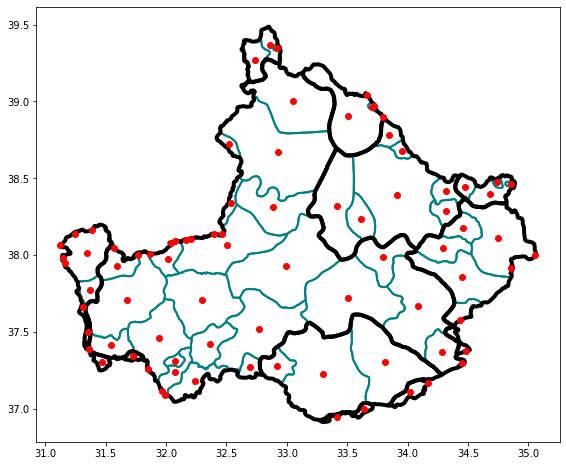

In [73]:
fig, ax = plt.subplots(figsize = (12,8))
ilceler.plot(color="none", edgecolor = "teal", linewidth=2, ax=ax)
iller.plot(color="none", edgecolor = "black", linewidth=4, ax=ax)
ilceler["centroid"].plot(color="red", ax=ax)
plt.show()

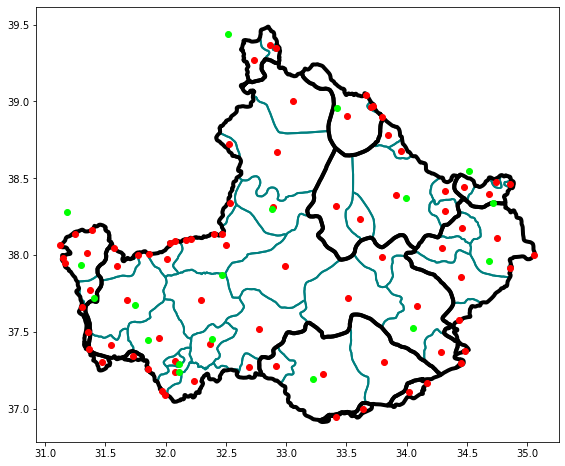

In [74]:
fig, ax = plt.subplots(figsize = (12,8))
ilceler.plot(color="none", edgecolor = "teal", linewidth=2, ax=ax)
iller.plot(color="none", edgecolor = "black", linewidth=4, ax=ax)
ilceler["centroid"].plot(color="red", ax=ax)
e_istasyon.plot(color="lime", ax=ax)
y_istasyon.plot(color="lime", ax=ax)
plt.show()